In [13]:
import sys
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

sys.path.append(os.path.abspath(os.path.join("..", "src")))

df = pd.read_csv('../Data/Processed/hotel_clean.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [14]:
df.info()
from sklearn.model_selection import train_test_split

# critères de base
x = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space',
        'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 1',
        'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
        'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
        'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
        'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation', 'market_segment_type_Complementary',
        'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']]

# Critère à prédire
y = df['booking_status_Not_Canceled']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
model = DecisionTreeClassifier()

In [17]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

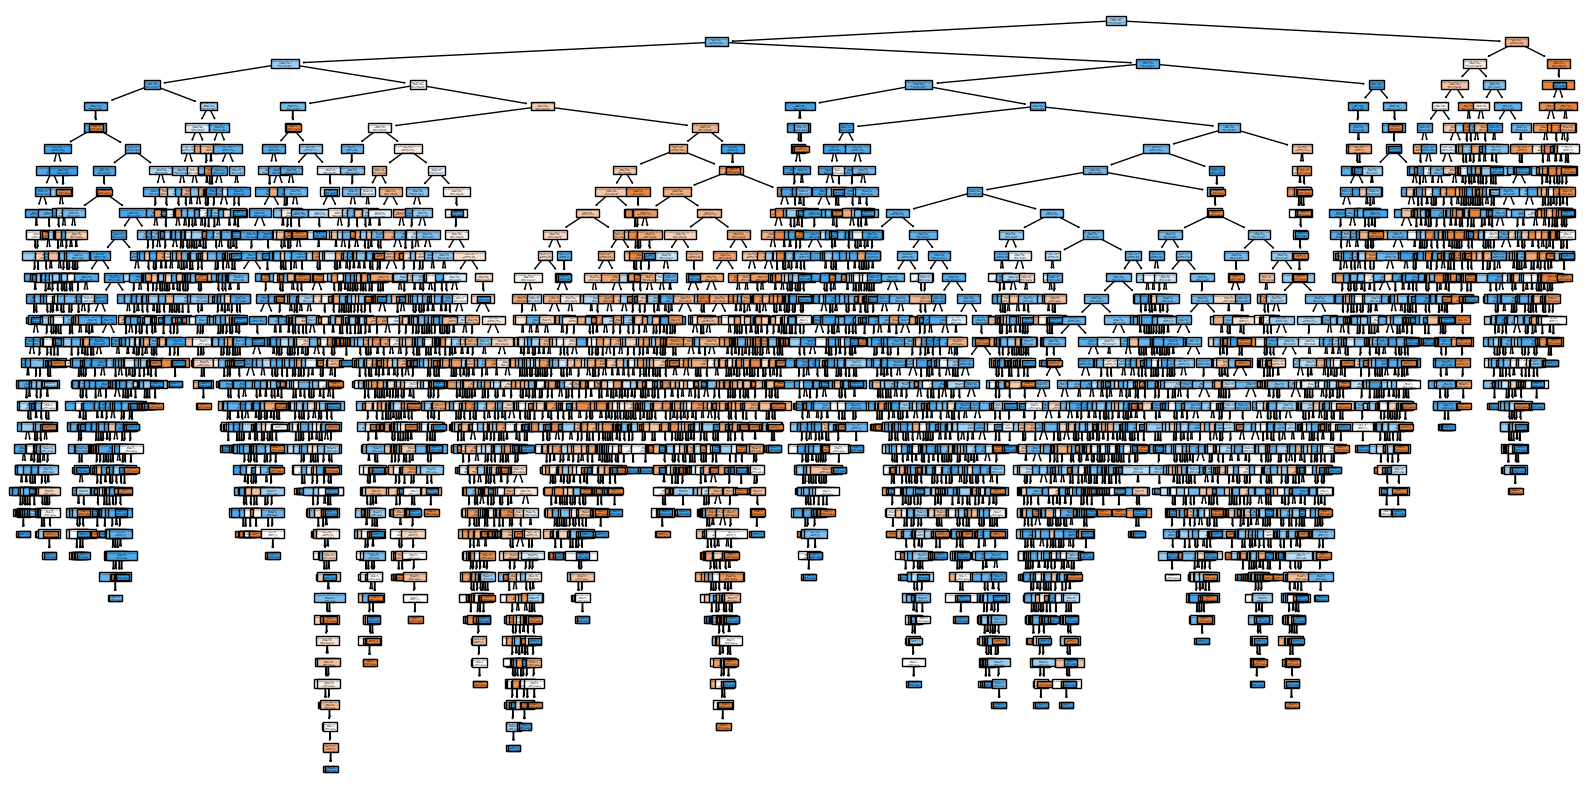

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 6. Affichage graphique de l'arbre pour débugger avec plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=x.columns, class_names=['Va annuler', 'Va venir'])
plt.show()

In [19]:
import numpy as np
from sklearn.model_selection import cross_val_score
print("Accuracy sur les données de test : ", np.round(model.score(x_test, y_test),2)) # Accuracy sur les données de test :  0.84
print("Score moyen par validation croisée : ", np.round(np.mean(cross_val_score(model,x, y, cv=5)), 2)) # Score moyen par validation croisée : 0.85

Accuracy sur les données de test :  0.84
Score moyen par validation croisée :  0.85


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
y_pred = model.predict(x_test)

print("Précision : ", np.round(precision_score(y_test, y_pred, average='binary', pos_label=1),2)) # Précision :  0.89
print("Rappel : ", np.round(recall_score(y_test, y_pred, average='binary', pos_label=1),2)) # Rappel :  0.88

Précision :  0.88
Rappel :  0.88


In [21]:
print(model.tree_.max_depth) # 33

35


In [22]:
print("Erreur quadratique moyenne : ", mean_squared_error(y_test, y_pred)) # 0.15716666666666668

Erreur quadratique moyenne :  0.15733333333333333


In [23]:

test_accuracy = accuracy_score(y_test, y_pred) # 0.8428
print(f"Accuracy sur les données de test : {test_accuracy:.4f}")

Accuracy sur les données de test : 0.8427


In [24]:
from graph_utils import display_predict_diff_errors

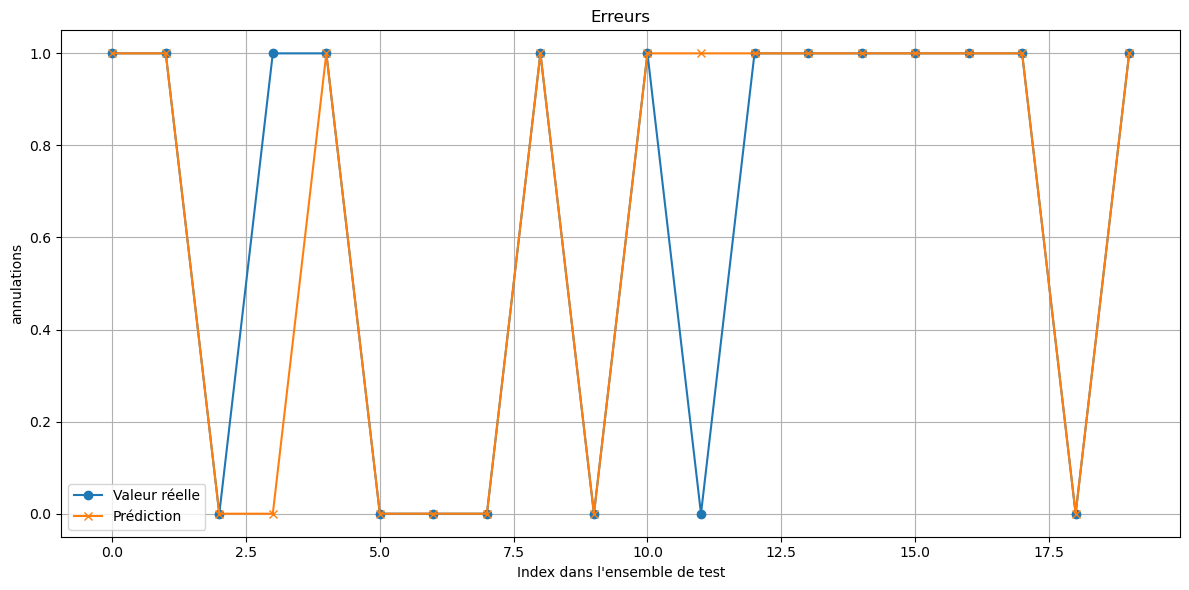

In [25]:
display_predict_diff_errors(y_test, y_pred)